<a href="https://colab.research.google.com/github/Roby290597/nlp_exercise/blob/main/bundestags_reden_analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os 
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET
import requests
import sys 


In [3]:
from pathlib import Path

extr = next((str(p/"extr") for p in [Path.cwd()] + list(Path.cwd().parents) if (p/"extr").is_dir()), None)
if extr and extr not in sys.path:
    sys.path.insert(0, extr)
print("extr hinzugefügt zu sys.path:", extr)

from redner_extraction import extract_speeches, extract_all_speakers, extract_comments 


extr hinzugefügt zu sys.path: c:\Users\brand\OneDrive\Desktop\AI_Selbststudium\ML_little\bundestag_reden\extr


c:\Users\brand\anaconda3\envs\job\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Device set to use cpu


In [4]:
# Füge Parent-Dir von `extr` zu sys.path hinzu, damit z.B. config.yaml gefunden werden kann
parent_dir = str(Path(extr).parent)
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
print("Parent-Dir hinzugefügt zu sys.path:", parent_dir)

print(os.listdir(parent_dir))


import yaml
# Load YAML data
with open(parent_dir + "\\config.yaml", "r") as file:
    data = yaml.safe_load(file)  # safe_load prevents arbitrary code execution

# Modify data (optional)
url = data['data']["xml_file"]


response = requests.get(url)

# XML in einen Tree parsen
tree = ET.ElementTree(ET.fromstring(response.content))

# Wurzel-Element abrufen
root = tree.getroot()

print(root.keys())

Parent-Dir hinzugefügt zu sys.path: c:\Users\brand\OneDrive\Desktop\AI_Selbststudium\ML_little\bundestag_reden
['.git', '.gitignore', 'config.yaml', 'extr', 'fine_tune_summarization.py', 'GPT_fine_tune_summarization.py', 'README.md', 'requirements.txt', 'results', 'src', 'tasks', 'ToDo.txt', 'web_ui']
['vertrieb', 'herstellung', 'sitzung-ort', 'herausgeber', 'issn', 'wahlperiode', 'sitzung-nr', 'sitzung-datum', 'sitzung-start-uhrzeit', 'sitzung-ende-uhrzeit', 'sitzung-naechste-datum', 'start-seitennr']


### Extraktion der Reden mitsamt Redner

In [5]:
reden = {}
redner = []
doppelt = []
# Beispiel-Ausgabe
for speech in extract_speeches(root):
    #print(f"Redner: {speech['name']}\nRede: {speech['text'][:200]}...\n")
    if speech['name'] not in redner:
        redner.append(speech['name'])
        reden[speech['name']] = speech['text']
    else:
        print("DOPPELT:", speech['name'])
        reden[speech['name']] += "\n Nächste Rede:" + speech['text']
        doppelt.append(speech['name'])

DOPPELT: Mandy Eißing
DOPPELT: Peter Bohnhof
DOPPELT: Mahmut Özdemir
DOPPELT: Klaus Wiener
DOPPELT: Mirze Edis


In [6]:
redner_party = []
all_speakers = extract_all_speakers(root)
for speaker in all_speakers:
    print(speaker)
    redner_party.append((speaker['vorname'] + " " + speaker['nachname'], speaker['fraktion']))

{'vorname': 'Bärbel', 'nachname': 'Bas', 'fraktion': '', 'rolle_kurz': 'Bundesministerin BMAS'}
{'vorname': 'Hans-Jürgen', 'nachname': 'Goßner', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Wilfried', 'nachname': 'Oellers', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Ricarda', 'nachname': 'Lang', 'fraktion': 'BÜNDNIS\xa090/DIE GRÜNEN', 'rolle_kurz': ''}
{'vorname': 'Pascal', 'nachname': 'Meiser', 'fraktion': 'Die Linke', 'rolle_kurz': ''}
{'vorname': 'Dagmar', 'nachname': 'Schmidt', 'fraktion': 'SPD', 'rolle_kurz': ''}
{'vorname': 'Peter', 'nachname': 'Bohnhof', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Sandra', 'nachname': 'Carstensen', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Armin', 'nachname': 'Grau', 'fraktion': 'BÜNDNIS\xa090/DIE GRÜNEN', 'rolle_kurz': ''}
{'vorname': 'Nora', 'nachname': 'Seitz', 'fraktion': 'CDU/CSU', 'rolle_kurz': ''}
{'vorname': 'Leif-Erik', 'nachname': 'Holm', 'fraktion': 'AfD', 'rolle_kurz': ''}
{'vorname': 'Peter', 'nachn

In [7]:
political_party = []
for name, party in redner_party:
    political_party.append(party) 

Counter({'CDU/CSU': 23, 'AfD': 18, 'BÜNDNIS\xa090/DIE GRÜNEN': 11, 'SPD': 10, 'Die Linke': 7, '': 5})
['Ministers', 'AfD', 'CDU/CSU', 'BÜNDNIS 90/DIE GRÜNEN', 'Die Linke', 'SPD']


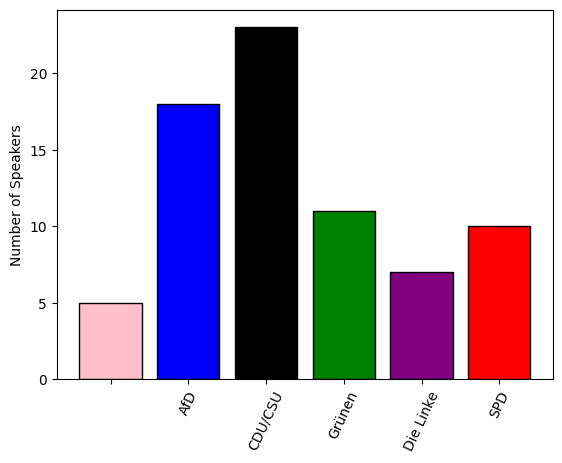

In [23]:
from collections import Counter
import matplotlib.pyplot as plt


poli_party = Counter(political_party)
print(poli_party)

labels = [p.replace("\xa0", " ") if p != "" else "Ministers" for p in poli_party.keys()]
labels2 = [p.replace("\xa0", " ") if p != "BÜNDNIS\xa090/DIE GRÜNEN" else "Grünen" for p in poli_party.keys()]
print(labels)
poli_party_col = ["pink","blue", "black", "green", "purple", "red"]
labels_col = list(zip(labels, poli_party_col))

plt.bar(labels2, list(poli_party.values()), color=poli_party_col, edgecolor='black')
plt.xticks(rotation=65)
plt.ylabel("Number of Speakers")
plt.show()

In [9]:
for i, poli in enumerate(reden.keys()):
    print(f"the length of {poli} is {len(reden[poli])} characters.")

the length of Bärbel Bas is 3926 characters.
the length of Hans-Jürgen Goßner is 4801 characters.
the length of Wilfried Oellers is 3031 characters.
the length of Ricarda Lang is 5828 characters.
the length of Pascal Meiser is 6894 characters.
the length of Dagmar Schmidt is 4048 characters.
the length of Peter Bohnhof is 8993 characters.
the length of Sandra Carstensen is 3915 characters.
the length of Armin Grau is 3252 characters.
the length of Nora Seitz is 4075 characters.
the length of Leif-Erik Holm is 4023 characters.
the length of Peter Aumer is 4249 characters.
the length of Jan Dieren is 3333 characters.
the length of Elisabeth Winkelmeier-Becker is 3684 characters.
the length of Tobias Matthias Peterka is 7068 characters.
the length of Axel Müller is 5325 characters.
the length of Lena Gumnior is 4502 characters.
the length of Mahmut Özdemir is 10951 characters.
the length of Luke Hoß is 5892 characters.
the length of Christian Moser is 4917 characters.
the length of Rainer

In [25]:
for politician in reden.keys():
    word_list = reden[politician].split(" ")
    print(f"the length of {politician} is {len(word_list)} words.")


the length of Bärbel Bas is 526 words.
the length of Hans-Jürgen Goßner is 668 words.
the length of Wilfried Oellers is 422 words.
the length of Ricarda Lang is 866 words.
the length of Pascal Meiser is 970 words.
the length of Dagmar Schmidt is 561 words.
the length of Peter Bohnhof is 1204 words.
the length of Sandra Carstensen is 516 words.
the length of Armin Grau is 447 words.
the length of Nora Seitz is 529 words.
the length of Leif-Erik Holm is 580 words.
the length of Peter Aumer is 606 words.
the length of Jan Dieren is 452 words.
the length of Elisabeth Winkelmeier-Becker is 497 words.
the length of Tobias Matthias Peterka is 979 words.
the length of Axel Müller is 718 words.
the length of Lena Gumnior is 592 words.
the length of Mahmut Özdemir is 1462 words.
the length of Luke Hoß is 842 words.
the length of Christian Moser is 653 words.
the length of Rainer Galla is 414 words.
the length of Maja Wallstein is 786 words.
the length of Helge Limburg is 463 words.
the length of

C:\Users\brand\AppData\Local\Temp\ipykernel_344\2557513140.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes = ax.boxplot(data, patch_artist=True, labels=labels2, showfliers=True)


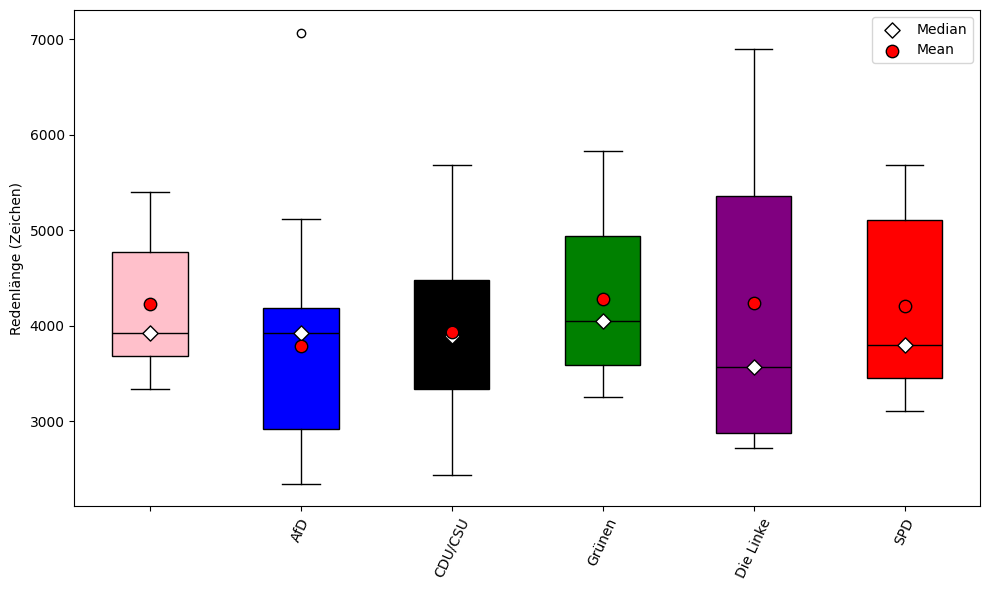

In [24]:
import numpy as np

# erstelle eine Liste von Sublisten mit Redenlängen pro Partei (Reihenfolge entspricht `labels`)
party_map = {}
for name, party in redner_party:
    key = party.replace("\xa0", " ") if party else "Ministers"
    text = reden.get(name)
    if name in doppelt:
        if text:
            party_map.setdefault(key, []).append(len(text)/2)
    else:
        if text:
            party_map.setdefault(key, []).append(len(text))

data = [party_map.get(lbl, []) for lbl in labels]


fig, ax = plt.subplots(figsize=(10, 6))
boxes = ax.boxplot(data, patch_artist=True, labels=labels2, showfliers=True)

# Farben für Boxen beibehalten
for patch, c in zip(boxes['boxes'], poli_party_col):
    patch.set_facecolor(c)
for median_line in boxes['medians']:
    median_line.set_color('black')

# Median und Mean berechnen und plotten
x = np.arange(1, len(data) + 1)
medians = [np.median(d) if len(d) else np.nan for d in data]
means = [np.mean(d) if len(d) else np.nan for d in data]

ax.scatter(x, medians, color='white', marker='D', s=60, zorder=5, label='Median', edgecolors='black')
ax.scatter(x, means, color='red', marker='o', edgecolor='black', s=80, zorder=6, label='Mean')

ax.set_ylabel("Redenlänge (Zeichen)")
plt.xticks(rotation=65)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_344\3232138821.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxes = ax.boxplot(data, patch_artist=True, labels=plot_labels, showfliers=True)


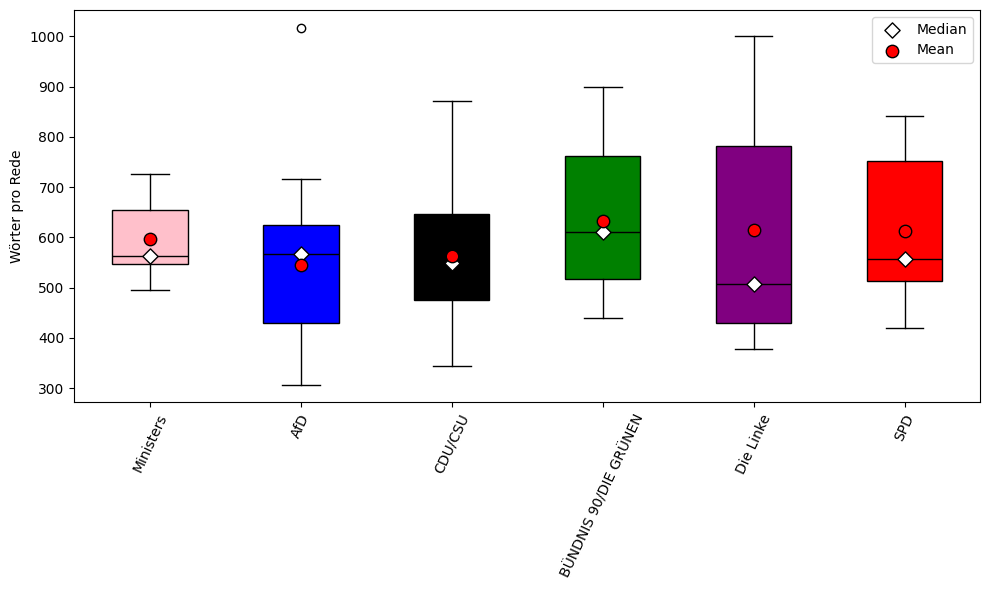

In [18]:
import numpy as np 

# Boxplot: Wörteranzahl pro Partei
party_word_map = {}
for name, party in redner_party:
    key = party.replace("\xa0", " ") if party else "Ministers"
    text = reden.get(name)
    if not text:
        continue
    words = text.split()
    cnt = len(words)
    if name in doppelt:
        cnt = cnt / 2
    party_word_map.setdefault(key, []).append(cnt)

plot_labels = [p if p != "" else "Ministers" for p in labels]
data = [party_word_map.get(lbl if lbl != "" else "Ministers", []) for lbl in labels]

fig, ax = plt.subplots(figsize=(10, 6))
boxes = ax.boxplot(data, patch_artist=True, labels=plot_labels, showfliers=True)

for patch, c in zip(boxes['boxes'], poli_party_col):
    patch.set_facecolor(c)
for median_line in boxes['medians']:
    median_line.set_color('black')

x = np.arange(1, len(data) + 1)
medians = [np.median(d) if len(d) else np.nan for d in data]
means = [np.mean(d) if len(d) else np.nan for d in data]

ax.scatter(x, medians, color='white', marker='D', s=60, zorder=5, label='Median', edgecolors='black')
ax.scatter(x, means, color='red', marker='o', edgecolor='black', s=80, zorder=6, label='Mean')

ax.set_ylabel("Wörter pro Rede")
plt.xticks(rotation=65)
ax.legend(loc='best')
plt.tight_layout()
plt.show()

C:\Users\brand\AppData\Local\Temp\ipykernel_344\977646812.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  b0 = axes[0].boxplot(chars_data, patch_artist=True, labels=labels2, showfliers=True)
C:\Users\brand\AppData\Local\Temp\ipykernel_344\977646812.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  b1 = axes[1].boxplot(words_data, patch_artist=True, labels=labels2, showfliers=True)


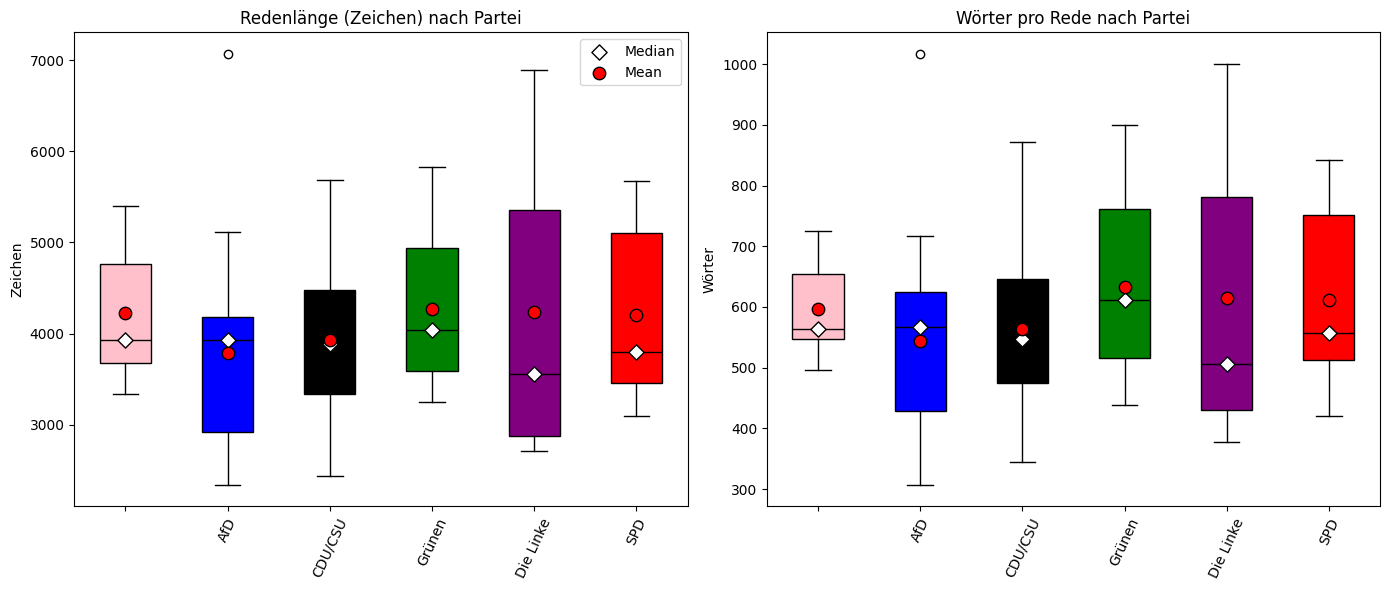

In [29]:
# Subplots: Boxplots für Zeichen- und Wortlängen pro Partei (verwendet bereits definierte Variablen)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Daten vorbereiten (Reihenfolge entspricht `labels`)
chars_data = [party_map.get(lbl, []) for lbl in labels]
words_data = [party_word_map.get(lbl, []) for lbl in labels]

# Boxplots erstellen
b0 = axes[0].boxplot(chars_data, patch_artist=True, labels=labels2, showfliers=True)
b1 = axes[1].boxplot(words_data, patch_artist=True, labels=labels2, showfliers=True)

# Farben setzen
for patch, c in zip(b0['boxes'], poli_party_col):
    patch.set_facecolor(c)
for patch, c in zip(b1['boxes'], poli_party_col):
    patch.set_facecolor(c)

# Medians schwarz setzen
for m in b0['medians'] + b1['medians']:
    m.set_color('black')

# Median und Mean berechnen und plotten
x = np.arange(1, len(chars_data) + 1)
med_chars = [np.median(d) if len(d) else np.nan for d in chars_data]
mean_chars = [np.mean(d) if len(d) else np.nan for d in chars_data]
med_words = [np.median(d) if len(d) else np.nan for d in words_data]
mean_words = [np.mean(d) if len(d) else np.nan for d in words_data]

axes[0].scatter(x, med_chars, color='white', marker='D', s=60, zorder=5, edgecolors='black', label='Median')
axes[0].scatter(x, mean_chars, color='red', marker='o', edgecolors='black', s=80, zorder=6, label='Mean')

axes[1].scatter(x, med_words, color='white', marker='D', s=60, zorder=5, edgecolors='black')
axes[1].scatter(x, mean_words, color='red', marker='o', edgecolors='black', s=80, zorder=6)

# Beschriftungen und Layout
axes[0].set_title("Redenlänge (Zeichen) nach Partei")
axes[1].set_title("Wörter pro Rede nach Partei")
axes[0].set_ylabel("Zeichen")
axes[1].set_ylabel("Wörter")
for ax in axes:
    plt.sca(ax)
    plt.xticks(rotation=65)
axes[0].legend(loc='best')
plt.tight_layout()
plt.show()

add a diagram for the word  length 

### Analyzing comments during the speeches 


In [15]:
from redner_extraction import extract_comments

comments_by_speech = extract_comments(root)

# quick summary printout
for sp, cmts in comments_by_speech.items():
    print(f"{sp}: {len(cmts)} comment(s)")
    for c in cmts[:5]:
        print(" -", c)
    print()

Bärbel Bas: 10 comment(s)
 - (Tino Chrupalla [AfD]: Super!)
 - (Beifall bei der SPD und der CDU/CSU – Dr. Bernd Baumann [AfD]: Das sieht man ja! Deswegen Verbrenner-Aus!)
 - (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU und des Abg. Andreas Audretsch [BÜNDNIS 90/DIE GRÜNEN])
 - (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU und des Abg. Pascal Meiser [Die Linke])
 - (Beifall bei der SPD sowie bei Abgeordneten der CDU/CSU)

Hans-Jürgen Goßner: 14 comment(s)
 - (Beifall bei der AfD – Dr. Ralf Stegner [SPD]: Das Monster hier sind Sie!)
 - (Beifall bei der AfD)
 - (Beifall bei der AfD)
 - (Beifall bei der AfD – Ricarda Lang [BÜNDNIS 90/DIE GRÜNEN]: Der Witz wird nicht besser, wenn man ihn zweimal macht!)
 - (Steffen Bilger [CDU/CSU]: Ist das noch parlamentarisch?)

Wilfried Oellers: 3 comment(s)
 - (Beifall bei der CDU/CSU)
 - (Beifall bei der CDU/CSU sowie bei Abgeordneten der SPD)
 - (Beifall beim BÜNDNIS 90/DIE GRÜNEN)

Ricarda Lang: 9 comment(s)
 - (Beifall beim BÜND